**Examen FINAL - Robótica II**

**Tema: Detector de Frutas**

**Integrantes**
- Ricardo Romero.
- Iván González.
- José Bergottini.

**Objetivo:** Entrenar el modelo para su uso posterior.

In [ ]:
# LIBRERIAS: Se importan las librerias requeridas

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image
from shutil import copyfile
import numpy as np
import zipfile
import os
import shutil
import random
import pandas as pd
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

from google.colab import drive
drive.mount('/content/drive')

2.14.0
Mounted at /content/drive


In [ ]:
# Función encargada de crear un directorio si no existe
def make_dir(ubicacion):
  if not os.path.exists(ubicacion):
    os.mkdir(ubicacion)
    return ubicacion
  else:
    shutil.rmtree(ubicacion)
    os.mkdir(ubicacion)
    return ubicacion

In [ ]:
# Función que separa los datos de training y validation:

#- SOURCE: Directorio que contiene los archivos.
#- TRAINING: Directorio en el que se copiarán los archivos del training.
#- VALIDATION: Directorio en el que se copiarán los archivos restantes.
#- SPLIT_SIZE: Porción de imagenes usadas para entrenar.

# Ejemplo: Si SPLIT_SIZE es 0.9 (90%) implica que el 90% de los datos de entrenamiento en el directorio de TRAINING serán usados para entrenar
# y el 10% serán usados para la validación.

def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))
  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
    else:
      print(filepath + ' no tiene datos dentro del mismo.')

def empty_directories(directorio):

  if len(os.listdir(directorio))>0:
    for file in os.scandir(directorio):
      os.remove(file.path)

In [ ]:
# Bloque encargado de separar los directorios de training, test y validation
try:
  root_dir = '/content/drive/My Drive/Examen'
  root_subdir = make_dir(os.path.join(root_dir,'Separacion_DATOS'))

  training_dir = make_dir(os.path.join(root_subdir,'training'))
  validation_dir = make_dir(os.path.join(root_subdir,'validation'))
  test_dir = make_dir(os.path.join(root_subdir,'test'))

  preview_dir = make_dir(os.path.join(root_subdir, 'preview'))

  training_first_dir = make_dir(os.path.join(training_dir,'Fresh Apples'))
  training_second_dir = make_dir(os.path.join(training_dir,'Fresh Bananas'))
  training_third_dir = make_dir(os.path.join(training_dir,'Fresh Oranges'))
  training_fourth_dir = make_dir(os.path.join(training_dir,'Rotten Apples'))
  training_fifth_dir = make_dir(os.path.join(training_dir,'Rotten Bananas'))
  training_sixth_dir = make_dir(os.path.join(training_dir,'Rotten Oranges'))

  validation_first_dir = make_dir(os.path.join(validation_dir,'Fresh Apples'))
  validation_second_dir = make_dir(os.path.join(validation_dir,'Fresh Bananas'))
  validation_third_dir = make_dir(os.path.join(validation_dir,'Fresh Oranges'))
  validation_fourth_dir = make_dir(os.path.join(validation_dir,'Rotten Apples'))
  validation_fifth_dir = make_dir(os.path.join(validation_dir,'Rotten Bananas'))
  validation_sixth_dir = make_dir(os.path.join(validation_dir,'Rotten Oranges'))

  test_first_dir = make_dir(os.path.join(test_dir,'Fresh Apples'))
  test_second_dir = make_dir(os.path.join(test_dir,'Fresh Bananas'))
  test_third_dir = make_dir(os.path.join(test_dir,'Fresh Oranges'))
  test_fourth_dir = make_dir(os.path.join(test_dir,'Rotten Apples'))
  test_fifth_dir = make_dir(os.path.join(test_dir,'Rotten Bananas'))
  test_sixth_dir = make_dir(os.path.join(test_dir,'Rotten Oranges'))

except FileExistsError:
  print('ERROR: El archivo no existe.')
except OSError:
  print('ERROR del OS.')

In [ ]:
#Se separan los datos en los directorios dados
TRAINING_SOURCE_DIR = "/content/drive/My Drive/Examen/dataset/train"
TEST_SOURCE_DIR     = "/content/drive/My Drive/Examen/dataset/test"

TRAINING_SOURCE_FIRST_DIR = os.path.join(TRAINING_SOURCE_DIR, "freshapples")
TRAINING_SOURCE_SECOND_DIR = os.path.join(TRAINING_SOURCE_DIR, "freshbanana")
TRAINING_SOURCE_THIRD_DIR= os.path.join(TRAINING_SOURCE_DIR, "freshoranges")
TRAINING_SOURCE_FOURTH_DIR = os.path.join(TRAINING_SOURCE_DIR, "rottenapples")
TRAINING_SOURCE_FIFTH_DIR = os.path.join(TRAINING_SOURCE_DIR, "rottenbanana")
TRAINING_SOURCE_SIXTH_DIR = os.path.join(TRAINING_SOURCE_DIR, "rottenoranges")

TEST_SOURCE_FIRST_DIR = os.path.join(TEST_SOURCE_DIR, "freshapples")
TEST_SOURCE_SECOND_DIR = os.path.join(TEST_SOURCE_DIR, "freshbanana")
TEST_SOURCE_THIRD_DIR = os.path.join(TEST_SOURCE_DIR, "freshoranges")
TEST_SOURCE_FOURTH_DIR = os.path.join(TEST_SOURCE_DIR, "rottenapples")
TEST_SOURCE_FIFTH_DIR = os.path.join(TEST_SOURCE_DIR, "rottenbanana")
TEST_SOURCE_SIXTH_DIR = os.path.join(TEST_SOURCE_DIR, "rottenoranges")

# Al finalizar, limpia los datos de las carpetas
empty_directories(training_first_dir)
empty_directories(training_second_dir)
empty_directories(training_third_dir)
empty_directories(training_fourth_dir)
empty_directories(training_fifth_dir)
empty_directories(training_sixth_dir)

empty_directories(validation_first_dir)
empty_directories(validation_second_dir)
empty_directories(validation_third_dir)
empty_directories(validation_fourth_dir)
empty_directories(validation_fifth_dir)
empty_directories(validation_sixth_dir)

empty_directories(test_first_dir)
empty_directories(test_second_dir)
empty_directories(test_third_dir)
empty_directories(test_fourth_dir)
empty_directories(test_fifth_dir)
empty_directories(test_sixth_dir)

split_size = 0.67 # Se usarán 67% de los datos de la carpeta train

split_data(TRAINING_SOURCE_FIRST_DIR, training_first_dir, validation_first_dir,
           split_size)
split_data(TRAINING_SOURCE_SECOND_DIR, training_second_dir, validation_second_dir,
           split_size)
split_data(TRAINING_SOURCE_THIRD_DIR, training_third_dir, validation_third_dir,
           split_size)
split_data(TRAINING_SOURCE_FOURTH_DIR, training_fourth_dir, validation_fourth_dir,
           split_size)
split_data(TRAINING_SOURCE_FIFTH_DIR, training_fifth_dir, validation_fifth_dir,
           split_size)
split_data(TRAINING_SOURCE_SIXTH_DIR, training_sixth_dir, validation_sixth_dir,
           split_size)

split_size = 1.0 # Debe ser 100% ya que ningún dato de este conjunto debe ir a
                 # validación

split_data(TEST_SOURCE_FIRST_DIR, test_first_dir, validation_first_dir,
           split_size)
split_data(TEST_SOURCE_SECOND_DIR, test_second_dir, validation_second_dir,
           split_size)
split_data(TEST_SOURCE_THIRD_DIR, test_third_dir, validation_third_dir,
           split_size)
split_data(TEST_SOURCE_FOURTH_DIR, test_fourth_dir, validation_fourth_dir,
           split_size)
split_data(TEST_SOURCE_FIFTH_DIR, test_fifth_dir, validation_fifth_dir,
           split_size)
split_data(TEST_SOURCE_SIXTH_DIR, test_sixth_dir, validation_sixth_dir,
           split_size)

# Proceso de augmentación de datos
Se usa para expandir el conjnto de entrenamiento de los datos generando variaciones de las imagenes existentes (traslación, rotación, cambios de escalas, ajustes de color, etc.) para que el modelo aprenda características más genéricas.

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Se inicia el generador
  train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, shear_range=0.2, width_shift_range=0.2, height_shift_range=0.2,
                                     zoom_range=0.2, horizontal_flip=True, vertical_flip=True, fill_mode='reflect')

  # Indica cuántos ejemplos de entrenamiento se usarán en cada iteración
  Batch_Size=32

  # Se genera los datos de entrenamiento
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR, batch_size=Batch_Size, color_mode='rgb', class_mode='categorical',
                                                      target_size=(150,150))

  # Normalización de los datos de validación
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Se generan los datos de validación
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR, batch_size=Batch_Size, color_mode='rgb', class_mode='categorical',
                                                                target_size=(150,150))

  # Normalización de los datos de prueba
  test_datagen = ImageDataGenerator(rescale=1./255)
  test_generator = test_datagen.flow_from_directory(test_dir, batch_size=1, target_size=(150, 150), shuffle = False, class_mode='categorical')

  return train_generator, validation_generator, train_datagen, test_generator, Batch_Size

# Se llama a los generadores en los directorios de training y validation
train_generator, validation_generator, train_datagen, test_generator, Batch_Size = train_val_generators(training_dir, validation_dir)

Found 7308 images belonging to 6 classes.
Found 3593 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


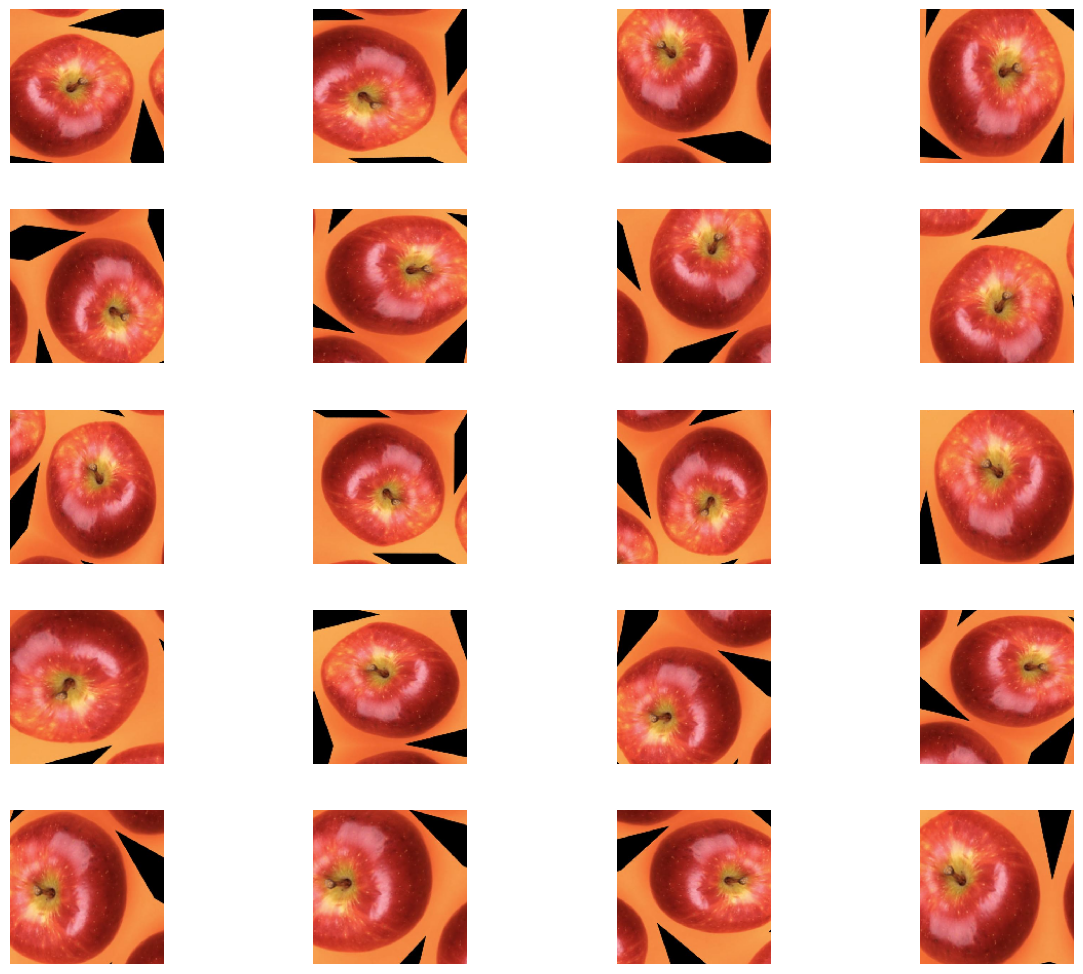

In [ ]:
# Se muestran los datos modificados
path_aug = os.path.join(training_first_dir, os.listdir(training_first_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i=0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)
plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot( int( (len(preview_img)/4) )+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(150, 150),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

In [ ]:
# Se muestran la longitud de datos usados en el training, validation y test
training_length = 0
for foldername in os.listdir(training_dir):
    training_length = training_length + len(os.listdir(os.path.join(training_dir,foldername)))

validation_length = 0
for foldername in os.listdir(validation_dir):
    validation_length = validation_length + len(os.listdir(os.path.join(validation_dir,foldername)))

test_length = 0
for foldername in os.listdir(test_dir):
    test_length = test_length + len(os.listdir(os.path.join(test_dir,foldername)))

print(training_length)
print(validation_length)
print(test_length)

7308
3593
2698


# Creación del modelo base

In [ ]:
def create_pre_trained_model():

  pre_trained_model = InceptionV3(input_shape=(150,150,3), include_top=False)

  # Las capas de este modelo no deben ser entrenadas
  for layer in pre_trained_model.layers:
    layer.trainable=False

  return pre_trained_model

pre_trained_model = create_pre_trained_model() # Se crea el modelo pre entrenado

def create_final_model(pre_trained_model):

  # Dense Layers: Se usan para aprender una clasificación basada en las características extraidas
  # por capas anteriores.

  x = layers.Flatten()(pre_trained_model.output)
  x = layers.Dense(units=1024, activation='relu')(x)

  x = layers.Dropout(0.2)(x)
  x = layers.Dense(units=6, activation='softmax')(x)

  model = Model(inputs=pre_trained_model.input,outputs=x)

  # Se compila el modelo
  model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  return model

# Se guarda el modelo generado
model = create_final_model(pre_trained_model)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Se define un Callback para detener el entrenamiento luego de un porcentaje de precisión alcanzado
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy')>0.97):
      print('\nSe ha alcanzado la precisión establecida.')
      self.model.stop_training=True

callbacks = myCallback()
history = model.fit(train_generator,
                    steps_per_epoch=(training_length/Batch_Size),
                    epochs = 75, # Cantidad de épocas
                    validation_data = validation_generator,
                    validation_steps=(validation_length/Batch_Size),
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/50
228/228 [==============================] - 412s 2s/step - loss: 2.4878 - accuracy: 0.8481 - val_loss: 0.1645 - val_accuracy: 0.9404
Epoch 2/50
228/228 [==============================] - 429s 2s/step - loss: 0.2667 - accuracy: 0.9149 - val_loss: 0.1613 - val_accuracy: 0.9446
Epoch 3/50
228/228 [==============================] - 401s 2s/step - loss: 0.2114 - accuracy: 0.9252 - val_loss: 0.1317 - val_accuracy: 0.9594
Epoch 4/50
228/228 [==============================] - 437s 2s/step - loss: 0.2077 - accuracy: 0.9309 - val_loss: 0.1295 - val_accuracy: 0.9580
Epoch 5/50
228/228 [==============================] - 433s 2s/step - loss: 0.2153 - accuracy: 0.9279 - val_loss: 0.1450 - val_accuracy: 0.9530
Epoch 6/50
228/228 [==============================] - 429s 2s/step - loss: 0.1789 - accuracy: 0.9417 - val_loss: 0.0999 - val_accuracy: 0.9655
Epoch 7/50
228/228 [==============================] - 438s 2s/step - loss: 0.1600 - accuracy: 0.9465 - val_loss: 0.1030 - val_accuracy: 0.9672

UnknownError: ignored

# Se gráfica la pérdida y la precisión

In [ ]:
def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Precisión de entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de validación')
  plt.title('Precisión del entrenamiento y validación de datos')

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Pérdida de entrenamiento')
  plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
  plt.title('Pérdida del entrenamiento y validación de datos')
  plt.legend()

  plt.show()

In [ ]:
# Se grafican los resultados
plot_loss_acc(history)

In [ ]:
loss, acc = model.evaluate(test_generator,steps=test_length,verbose=1)
print('Precisión del entrenamiento: ',acc)
print('Pérdida del entrenamiento: ', loss)

In [ ]:
# Se almacena el modelo en un archivo HDF5
model.save('/content/drive/MyDrive/Examen/MODELO_entrenado.h5')